## US Baby Names Data Analysis (from 1880 till 2020)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls names

NationalReadMe.pdf  yob1908.txt  yob1937.txt  yob1966.txt  yob1995.txt
yob1880.txt	    yob1909.txt  yob1938.txt  yob1967.txt  yob1996.txt
yob1881.txt	    yob1910.txt  yob1939.txt  yob1968.txt  yob1997.txt
yob1882.txt	    yob1911.txt  yob1940.txt  yob1969.txt  yob1998.txt
yob1883.txt	    yob1912.txt  yob1941.txt  yob1970.txt  yob1999.txt
yob1884.txt	    yob1913.txt  yob1942.txt  yob1971.txt  yob2000.txt
yob1885.txt	    yob1914.txt  yob1943.txt  yob1972.txt  yob2001.txt
yob1886.txt	    yob1915.txt  yob1944.txt  yob1973.txt  yob2002.txt
yob1887.txt	    yob1916.txt  yob1945.txt  yob1974.txt  yob2003.txt
yob1888.txt	    yob1917.txt  yob1946.txt  yob1975.txt  yob2004.txt
yob1889.txt	    yob1918.txt  yob1947.txt  yob1976.txt  yob2005.txt
yob1890.txt	    yob1919.txt  yob1948.txt  yob1977.txt  yob2006.txt
yob1891.txt	    yob1920.txt  yob1949.txt  yob1978.txt  yob2007.txt
yob1892.txt	    yob1921.txt  yob1950.txt  yob1979.txt  yob2008.txt
yob1893.txt	    yob1922.txt  yob1951.txt  yob1980.txt  yob

In [3]:
!head -n 10 names/yob2020.txt

Olivia,F,17535
Emma,F,15581
Ava,F,13084
Charlotte,F,13003
Sophia,F,12976
Amelia,F,12704
Isabella,F,12066
Mia,F,11157
Evelyn,F,9445
Harper,F,8778


In [4]:
names2020 = pd.read_csv("names/yob2020.txt", names=["name", "gender", "births"])
names2020

,name,gender,births
0,Olivia,F,17535
1,Emma,F,15581
2,Ava,F,13084
3,Charlotte,F,13003
4,Sophia,F,12976
...,...,...,...
31266,Zykell,M,5
31267,Zylus,M,5
31268,Zymari,M,5
31269,Zyn,M,5


In [5]:
names2020.groupby('gender')['births'].sum()

gender
F    1598836
M    1706423
Name: births, dtype: int64

In [6]:
years = range(1880, 2021)

In [7]:
pieces = [] # list of dataframes
columns = ["name", "gender", "births"]

for year in years:
    path = f"names/yob{year}.txt"
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [8]:
len(pieces)

141

In [9]:
names = pd.concat(pieces, ignore_index=True)
names.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [10]:
names.tail()

,name,gender,births,year
2020858,Zykell,M,5,2020
2020859,Zylus,M,5,2020
2020860,Zymari,M,5,2020
2020861,Zyn,M,5,2020
2020862,Zyran,M,5,2020


In [11]:
total_births = names.pivot_table('births', index='year', columns='gender', aggfunc='sum')
total_births.tail()

gender,F,M
year,,
2016,1768360,1893917
2017,1722140,1846154
2018,1695654,1810309
2019,1670419,1785527
2020,1598836,1706423


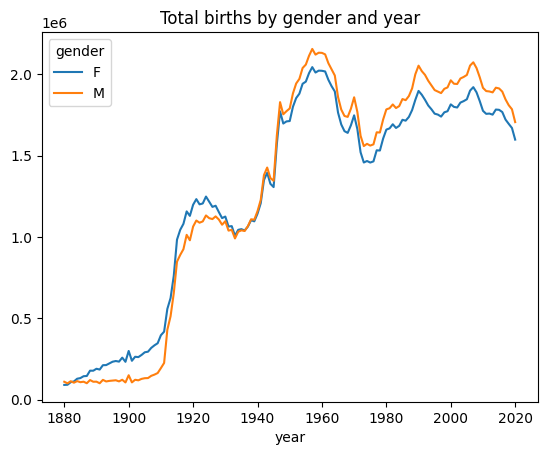

In [12]:
total_births.plot(title="Total births by gender and year");

**Way 1 of getting prop column : using groupby and apply methods**

In [13]:
def add_prop(group):
    group['prop'] = group['births']/group['births'].sum()
    return group

In [14]:
names1 = names.groupby(['year', 'gender']).apply(add_prop)
names1.reset_index(inplace=True, drop=True)
names1

/tmp/ipykernel_6928/203134839.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names1 = names.groupby(['year', 'gender']).apply(add_prop)


,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2020858,Zykell,M,5,2020,0.000003
2020859,Zylus,M,5,2020,0.000003
2020860,Zymari,M,5,2020,0.000003
2020861,Zyn,M,5,2020,0.000003


**Way 2 of getting prop column : using groupby and merging dataframes**

In [23]:
sum_births = names.groupby(['gender', 'year'])['births'].sum().reset_index()
sum_births

,gender,year,births
0,F,1880,90994
1,F,1881,91953
2,F,1882,107847
3,F,1883,112319
4,F,1884,129019
...,...,...,...
277,M,2016,1893917
278,M,2017,1846154
279,M,2018,1810309
280,M,2019,1785527


In [16]:
names = pd.merge(names, sum_births, on = ['gender', 'year'], suffixes=("", "_total"))
names

,name,gender,births,year,births_total
0,Mary,F,7065,1880,90994
1,Anna,F,2604,1880,90994
2,Emma,F,2003,1880,90994
3,Elizabeth,F,1939,1880,90994
4,Minnie,F,1746,1880,90994
...,...,...,...,...,...
2020858,Zykell,M,5,2020,1706423
2020859,Zylus,M,5,2020,1706423
2020860,Zymari,M,5,2020,1706423
2020861,Zyn,M,5,2020,1706423


In [17]:
names['prop'] = names['births']/names['births_total']
names

,name,gender,births,year,births_total,prop
0,Mary,F,7065,1880,90994,0.077642
1,Anna,F,2604,1880,90994,0.028617
2,Emma,F,2003,1880,90994,0.022012
3,Elizabeth,F,1939,1880,90994,0.021309
4,Minnie,F,1746,1880,90994,0.019188
...,...,...,...,...,...,...
2020858,Zykell,M,5,2020,1706423,0.000003
2020859,Zylus,M,5,2020,1706423,0.000003
2020860,Zymari,M,5,2020,1706423,0.000003
2020861,Zyn,M,5,2020,1706423,0.000003


In [18]:
names.groupby(['year',  'gender'])['prop'].sum()

year  gender
1880  F         1.0
      M         1.0
1881  F         1.0
      M         1.0
1882  F         1.0
               ... 
2018  M         1.0
2019  F         1.0
      M         1.0
2020  F         1.0
      M         1.0
Name: prop, Length: 282, dtype: float64

In [19]:
def get_top1000(group):
    return group.sort_values(by="births", ascending=False)[:1000]

In [20]:
grouped = names.groupby(['year', 'gender'])

In [21]:
top1000 = grouped.apply(get_top1000)

/tmp/ipykernel_6928/310749317.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


In [24]:
top1000.reset_index(inplace=True, drop=True)
top1000.drop('births_total', axis=1, inplace=True)
top1000

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
281871,Willie,M,211,2020,0.000124
281872,Kylian,M,211,2020,0.000124
281873,Turner,M,211,2020,0.000124
281874,Rogelio,M,210,2020,0.000123


### Analyze name trends (1880-2020)

In [25]:
male = top1000[top1000['gender'] == 'M']
female = top1000[top1000['gender'] == 'F']

In [26]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc='sum')
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Aarya,Aayan,Ab,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,284.0,4645.0,NaN,519.0,7166.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,890.0,NaN,248.0,NaN
2017,241.0,291.0,4181.0,NaN,526.0,7208.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,850.0,NaN,301.0,NaN
2018,NaN,NaN,3833.0,NaN,488.0,5975.0,NaN,NaN,NaN,NaN,...,276.0,NaN,NaN,269.0,NaN,NaN,1131.0,NaN,323.0,NaN


In [27]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 1880 to 2020
Columns: 7248 entries, Aaden to Zyon
dtypes: float64(7248)
memory usage: 7.8 MB


In [33]:
total_births.isnull().sum()[total_births.isnull().sum() * 100/141 == 0].sample(4)

name
Alvin      0
Rosa       0
Edwin      0
Johanna    0
dtype: int64

In [34]:
subset = total_births[['Alvin', 'Rosa', 'Edwin', 'Johanna']]

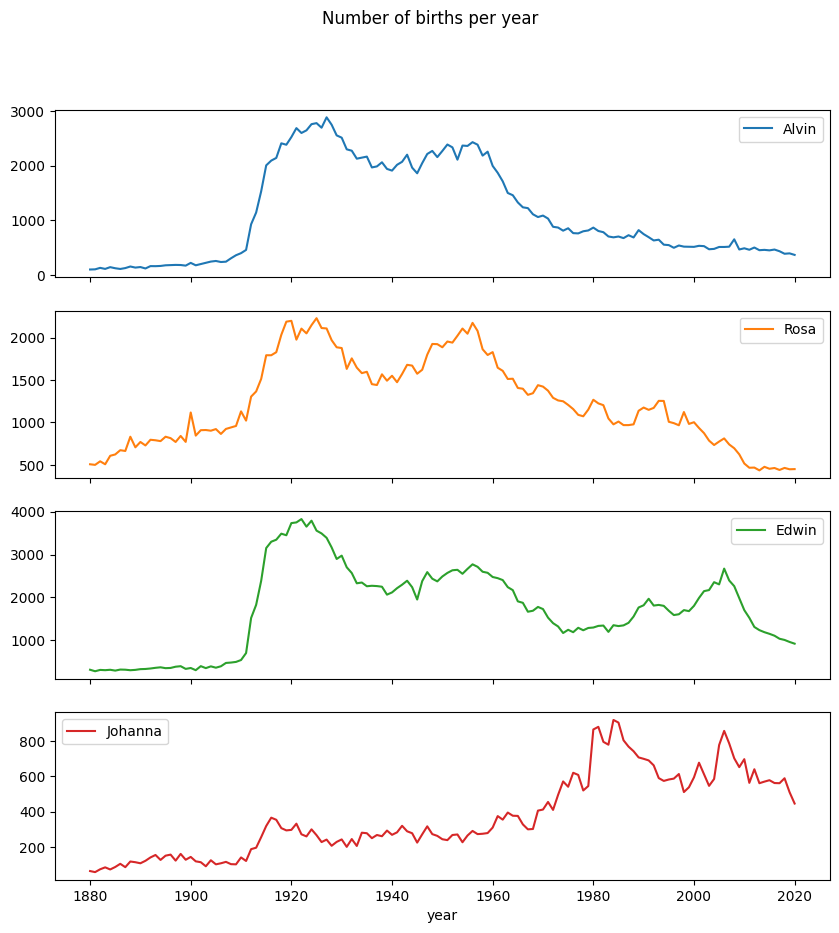

In [35]:
subset.plot(subplots=True, figsize=(10,10), grid=False, title='Number of births per year')
plt.show()

### Measuring Name Diversity

In [36]:
tab = top1000.pivot_table('prop', index='year', columns='gender', aggfunc='sum')

In [37]:
tab

gender,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2016,0.742026,0.837362
2017,0.740761,0.833615
2018,0.741509,0.829461


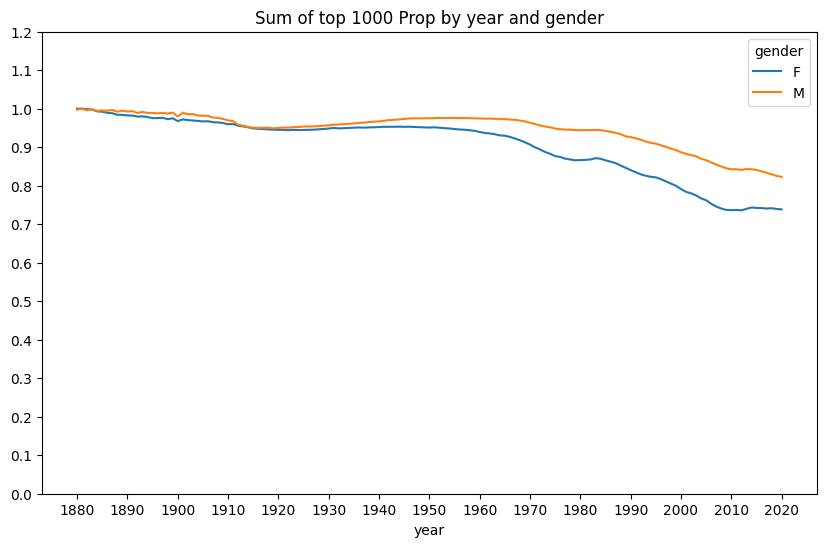

In [40]:
tab.plot(title="Sum of top 1000 Prop by year and gender", yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2030, 10), figsize=(10,6))
plt.show()

In [41]:
dfm = male[male['year'] == 2020]
dfm.head()

,name,gender,births,year,prop
280876,Liam,M,19659,2020,0.011521
280877,Noah,M,18252,2020,0.010696
280878,Oliver,M,14147,2020,0.008290
280879,Elijah,M,13034,2020,0.007638
280880,William,M,12541,2020,0.007349


In [42]:
prop_cumsum = dfm.sort_values(by='prop', ascending=False)['prop'].cumsum()
prop_cumsum[:10]

280876    0.011521
280877    0.022217
280878    0.030507
280879    0.038145
280880    0.045495
280881    0.052673
280882    0.059785
280883    0.066396
280884    0.072670
280885    0.078618
Name: prop, dtype: float64

In [44]:
prop_cumsum.values.searchsorted(0.5) + 1

163

In [45]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group['prop'].cumsum().values.searchsorted(q) + 1

In [46]:
diversity = top1000.groupby(['year', 'gender']).apply(get_quantile_count)
diversity = diversity.unstack('gender')
diversity.head()

/tmp/ipykernel_6928/1293477516.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(['year', 'gender']).apply(get_quantile_count)


gender,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


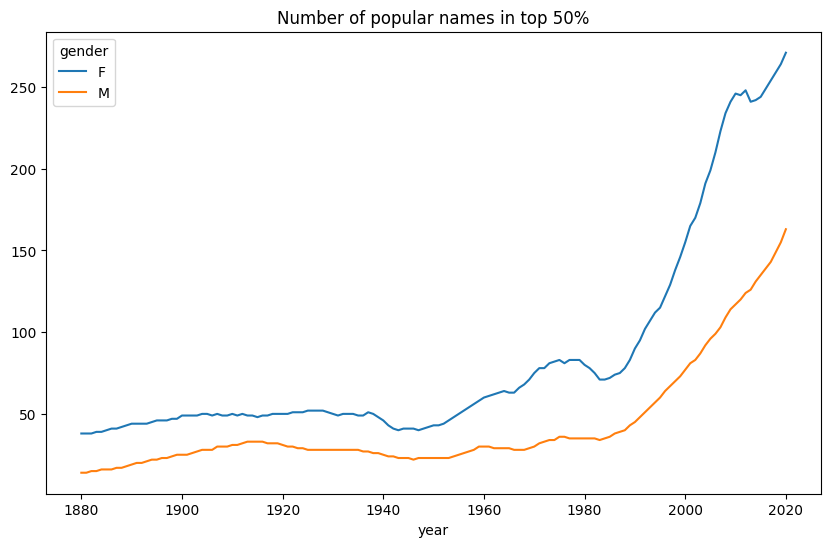

In [47]:
diversity.plot(title="Number of popular names in top 50%", figsize=(10,6))
plt.show()